# Import

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from matplotlib.patches import Ellipse

from grace.visuomotor import PeopleAttention

# Initialization 

In [2]:
image_list = []
image_path_list = []
folder_path = os.path.join(os.getcwd(),'results', 'reset_capture_eyes_chest_cam')
for i, filename in enumerate(sorted(os.listdir(folder_path))):
    try:
        img_path = os.path.join(folder_path, filename)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_list.append(image)
        image_path_list.append(img_path)
    except:
        pass

In [14]:
def create_anaglyph(left_image, right_image):
    """
    Creates an anaglyph image from two input images.
    
    Args:
        left_image (np.ndarray): The left image.
        right_image (np.ndarray): The right image.
    
    Returns:
        np.ndarray: The anaglyph image.
    """
    # Convert the images to grayscale
    left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)
    
    # Create the anaglyph image
    anaglyph = np.zeros_like(left_image)
    anaglyph[:, :, 0] = right_gray # Red channel
    anaglyph[:, :, 1] = left_gray   # Green channel
    anaglyph[:, :, 2] = right_gray  # Blue channel
    
    return anaglyph

# Face Detection

In [ ]:
# Face Detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(os.path.join(os.getcwd(),'pretrained','shape_predictor_68_face_landmarks.dat'))
dlib.cuda.set_device(0)

In [ ]:
# Getting Target Pixels
pixel_list = []
disp_img_list = []
for i in range(len(image_list)):
    img = image_list[i]
    l_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector(l_gray, 0)
    if len(detections)>0:
        detection = detections[0]
        landmarks = predictor(img, detection)
        x_target = round((landmarks.part(40).x + landmarks.part(43).x)/2)
        y_target = round((landmarks.part(40).y + landmarks.part(43).y)/2)
        pixel_list.append((x_target, y_target))
        disp_img = cv2.rectangle(img, (detection.left(), detection.top()), (detection.right(), detection.bottom()), (0, 0, 255), 2)
        disp_img = cv2.drawMarker(disp_img, (x_target,y_target), color=(255, 0, 0), markerType=cv2.MARKER_TILTED_CROSS, markerSize=13, thickness=2)
        disp_img_list.append(disp_img)
    else:
        pixel_list.append((None, None))
        disp_img_list.append(img)

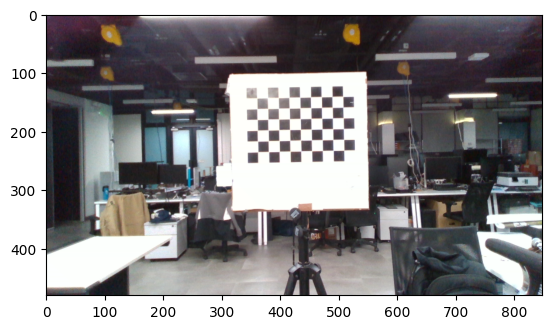

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_035230_528459_resetcaptureeyeschestcam_chestimg.png


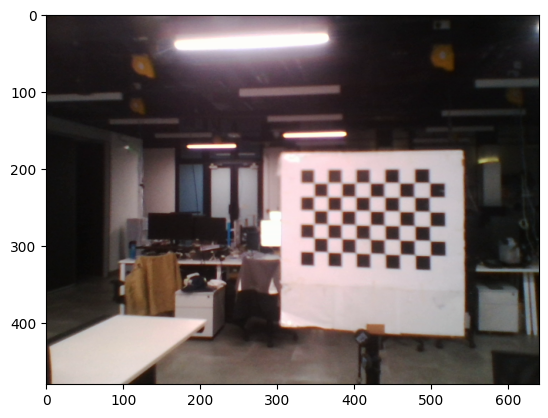

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_035230_528459_resetcaptureeyeschestcam_leftimg.png


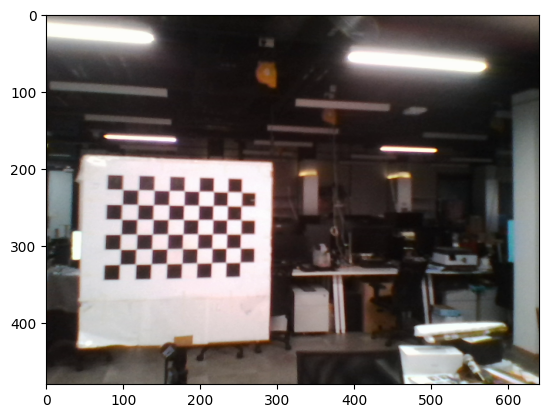

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_035230_528459_resetcaptureeyeschestcam_rightimg.png


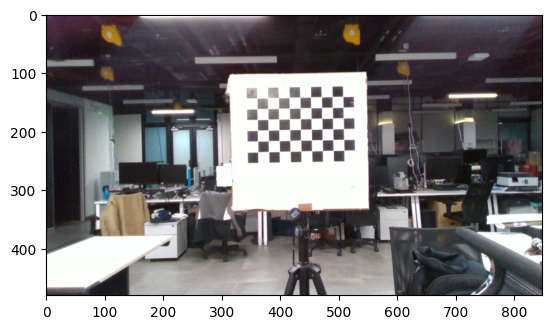

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_040059_550614_resetcaptureeyeschestcam_chestimg.png


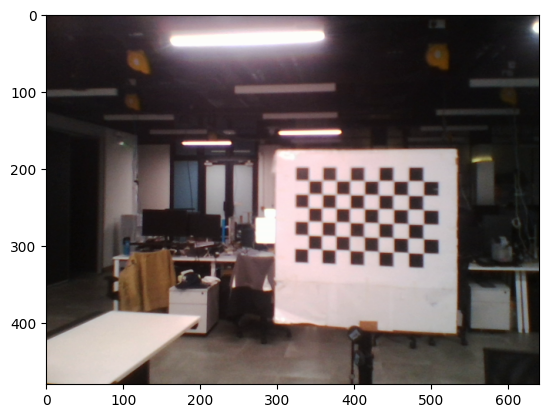

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_040059_550614_resetcaptureeyeschestcam_leftimg.png


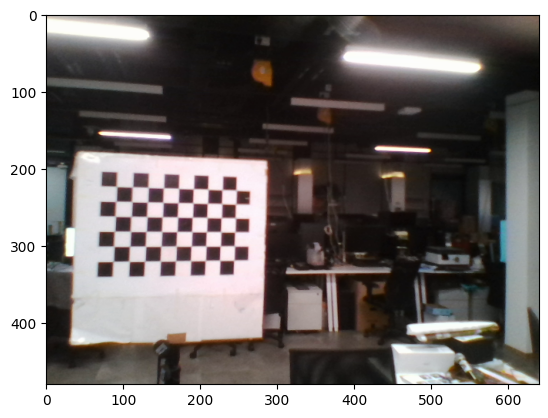

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_040059_550614_resetcaptureeyeschestcam_rightimg.png


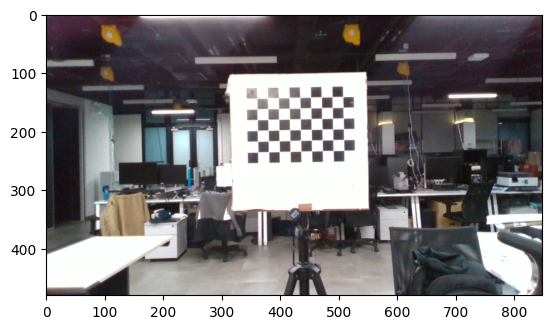

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_040838_543527_resetcaptureeyeschestcam_chestimg.png


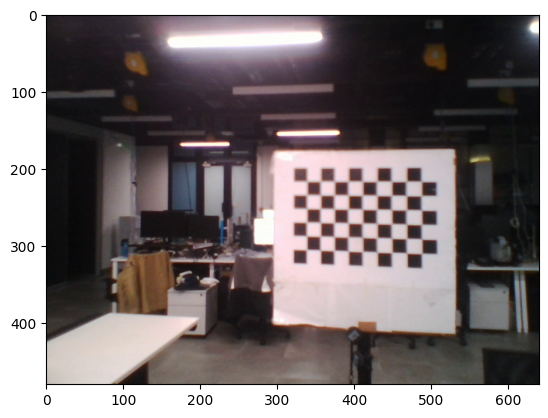

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_040838_543527_resetcaptureeyeschestcam_leftimg.png


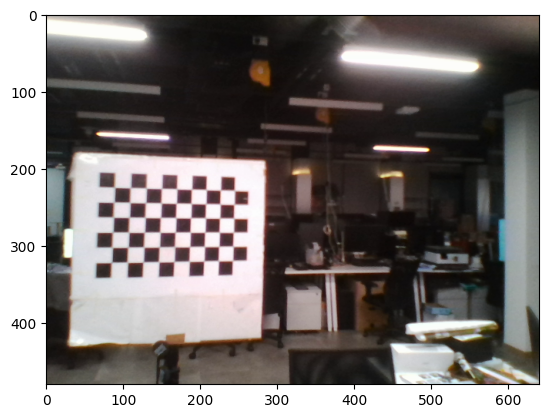

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_040838_543527_resetcaptureeyeschestcam_rightimg.png


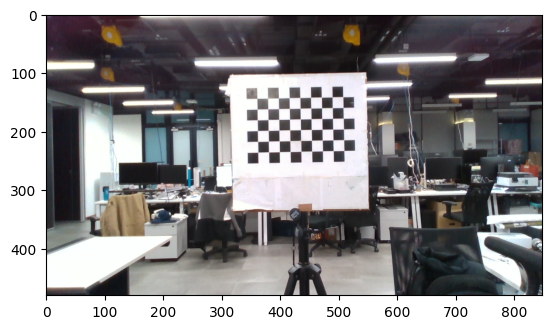

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_041731_728993_resetcaptureeyeschestcam_chestimg.png


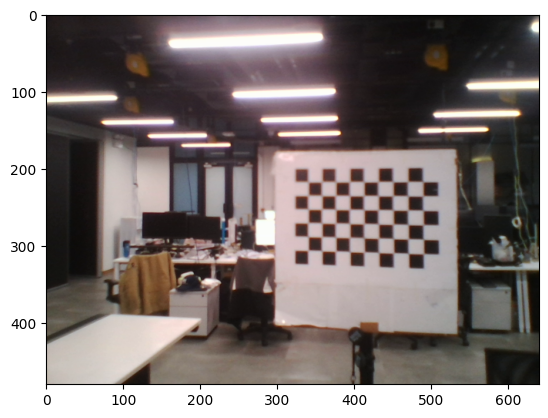

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_041731_728993_resetcaptureeyeschestcam_leftimg.png


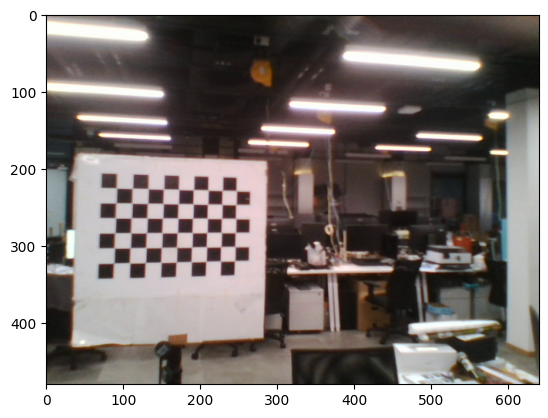

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_041731_728993_resetcaptureeyeschestcam_rightimg.png


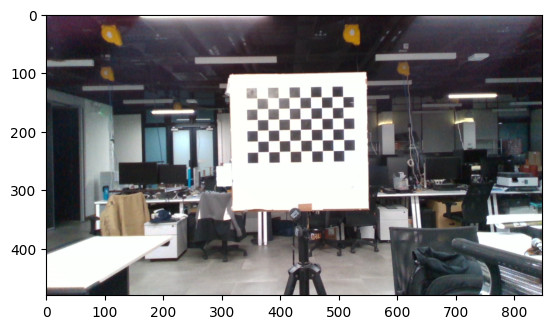

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_043009_733358_resetcaptureeyeschestcam_chestimg.png


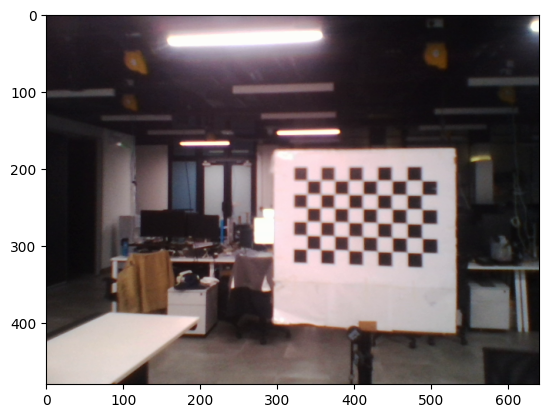

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_043009_733358_resetcaptureeyeschestcam_leftimg.png


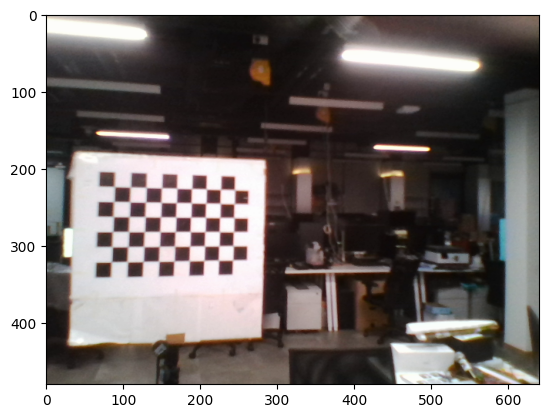

/home/jaynieles/dev/grace_robot/results/reset_capture_eyes_chest_cam/20240606_043009_733358_resetcaptureeyeschestcam_rightimg.png


In [4]:
# Check Images
for i in range(len(image_list)):
    img = image_list[i]
    plt.imshow(img)
    plt.show()
    print(image_path_list[i])

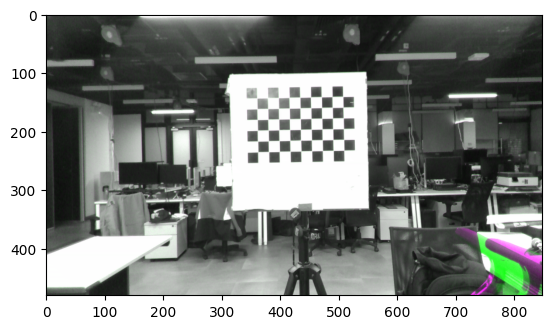

In [17]:
# Anaglyph

chest_ana = create_anaglyph(image_list[0], image_list[3])
plt.figure()
plt.imshow(chest_ana)

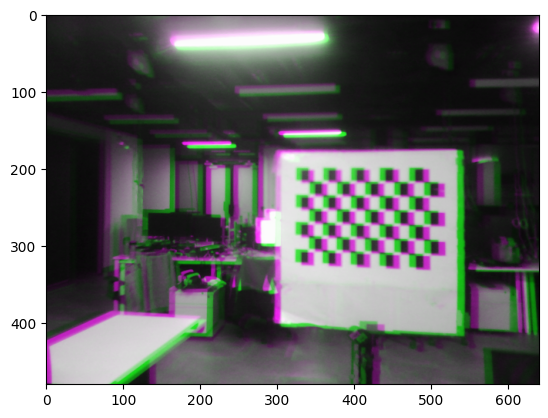

In [15]:
# Anaglyph

left_ana = create_anaglyph(image_list[1], image_list[4])
plt.figure()
plt.imshow(left_ana)

(250.0, 150.0)

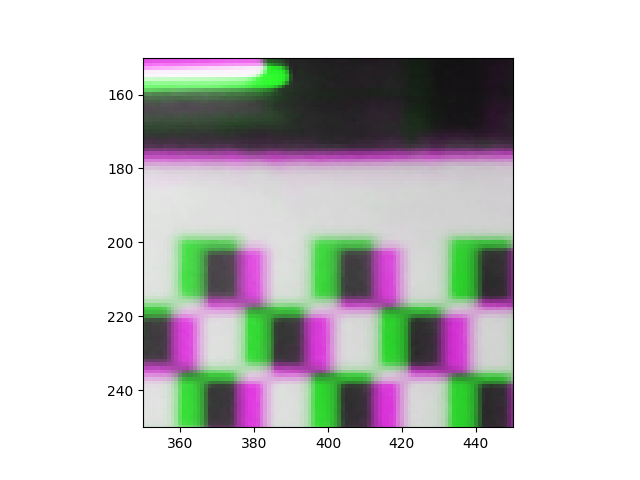

In [23]:
# Anaglyph

left_ana = create_anaglyph(image_list[1], image_list[4])
plt.figure()
plt.imshow(left_ana)
plt.xlim([350,450])
plt.ylim([250,150])

In [22]:
%matplotlib widget

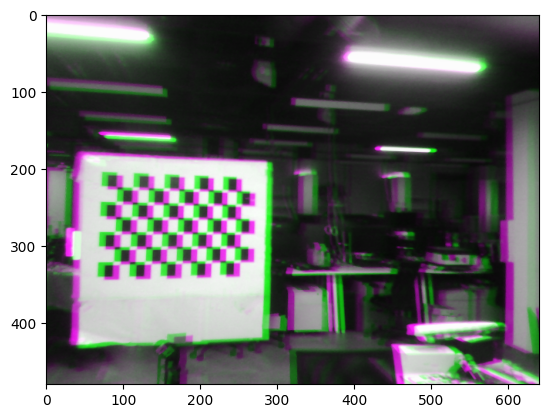

In [16]:
# Anaglyph

right_ana = create_anaglyph(image_list[2], image_list[5])
plt.figure()
plt.imshow(right_ana)

# DataFrame

# Analysis

## Data Filtering

In [ ]:
# Data Gathering

left_pixel_x_list = []
left_pixel_y_list = []
right_pixel_x_list = []
right_pixel_y_list = []
for i in range(len(image_list)):
    x = pixel_list[i]
    if i//10 == 0:
        left_pixel_x_list.append(pixel_list[i][0])
        left_pixel_y_list.append(pixel_list[i][1])
    elif i//10 == 1:
        right_pixel_x_list.append(pixel_list[i][0])
        right_pixel_y_list.append(pixel_list[i][1])

mean_left_pixel_x = np.mean(left_pixel_x_list)
std_left_pixel_x = np.std(left_pixel_x_list)
mean_left_pixel_y = np.mean(left_pixel_y_list)
std_left_pixel_y = np.std(left_pixel_y_list)

mean_right_pixel_x = np.mean(right_pixel_x_list)
std_right_pixel_x = np.std(right_pixel_x_list)
mean_right_pixel_y = np.mean(right_pixel_y_list)
std_right_pixel_y = np.std(right_pixel_y_list)

print('mean_left_pixel_x:', mean_left_pixel_x)
print('std_left_pixel_x:',std_left_pixel_x)
print('mean_left_pixel_y:',mean_left_pixel_y)
print('std_left_pixel_y:',std_left_pixel_y)

print('mean_right_pixel_x:',mean_right_pixel_x)
print('std_right_pixel_x:',std_right_pixel_x)
print('mean_right_pixel_y:',mean_right_pixel_y)
print('std_right_pixel_y:',std_right_pixel_y)

In [ ]:
left_pixel_x_list

## Plotting

In [ ]:
# Left Eye

for i in range(len(image_list)):
    x = pixel_list[i][0]
    y = pixel_list[i][1]
    if i//10 == 0:
        marker='.'
    if i%2== 0:
        color = 'red'
    elif i%2 == 1:
        color = 'orange'
    alpha = 0.3
    if i//10 == 0:
        plt.scatter(x,y, color=color, marker=marker, alpha=alpha)

# Left Eye
plt.axhline(y=202, color='black', alpha=0.5)
plt.axvline(x=315, color='black', alpha=0.5)

plt.scatter(mean_left_pixel_x, mean_left_pixel_y, color='black')
ellipse = Ellipse((mean_left_pixel_x, mean_left_pixel_y), 
                  width=std_left_pixel_x*2, 
                  height=std_left_pixel_y*2, 
                  fill=True, color='gray', label='Std Dev', alpha=0.2)
plt.gca().add_patch(ellipse)

plt.xlim([200, 400])
plt.ylim([250,180])     
plt.ylabel('y (px)')
plt.xlabel('x (px)')
plt.grid()
plt.title('Left Eye Center [%.2f px, %.2f px]' % (mean_left_pixel_x, mean_left_pixel_y))
plt.show()

In [ ]:
# Right Eye

for i in range(len(image_list)):
    x = pixel_list[i][0]
    y = pixel_list[i][1]
    if i//10 == 1:
        marker='.'
    if i%2== 0:
        color = 'red'
    elif i%2 == 1:
        color = 'orange'
    alpha = 0.3
    if i//10 == 1:
        plt.scatter(x,y, color=color, marker=marker, alpha=alpha)

# Right Eye
plt.axhline(y=219, color='black', alpha=0.5)
plt.axvline(x=302, color='black', alpha=0.5)

plt.scatter(mean_right_pixel_x, mean_right_pixel_y, color='black')
ellipse = Ellipse((mean_right_pixel_x, mean_right_pixel_y), 
                  width=std_right_pixel_x*2, 
                  height=std_right_pixel_y*2, 
                  fill=True, color='gray', label='Std Dev', alpha=0.2)
plt.gca().add_patch(ellipse)

plt.xlim([200, 400])
plt.ylim([250,180])    
plt.ylabel('y (px)')
plt.xlabel('x (px)')
plt.grid()
plt.title('Right Eye Center [%.2f px, %.2f px]' % (mean_right_pixel_x, mean_right_pixel_y))
plt.show()